In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
data = pd.read_csv('data.csv')
data


,steps_during_morning,steps_during_afternoon,steps_during_evening,steps_during_bedtime,steps_during_morning_ndays_mean,steps_during_morning_ndays_stdev,steps_during_morning_ndays_gradient,steps_during_afternoon_ndays_mean,steps_during_afternoon_ndays_stdev,steps_during_afternoon_ndays_gradient,...,mesor_ndays_stdev,goodness_of_fit_ndays_mean,goodness_of_fit_ndays_stdev,goodness_of_fit_ndays_gradient,amplitude,mesor,acrophase,goodness_of_fit,timestamp,patient_id
0,46.0,4271.0,3886.0,238.0,2407.000,1517.620,1359.000,6049.67,4045.350,4024.0000,...,1.809390,0.468774,0.092405,0.028774,16.55450,75.8027,13.51340,0.636873,2015-08-30,0
1,8975.0,4294.0,1209.0,238.0,7144.570,2499.000,650.500,7533.57,3439.870,-463.6070,...,2.250650,0.615644,0.048942,-0.012300,13.46240,78.3996,13.83120,0.473510,2015-10-28,0
2,204.0,428.0,835.0,617.0,3088.710,1675.700,524.071,4489.14,2921.570,-81.9286,...,3.913680,0.448787,0.137939,0.052349,11.49640,67.4808,15.19090,0.210210,2015-05-24,0
3,9344.0,2775.0,1269.0,40.0,2935.000,3617.560,5116.000,10290.00,420.021,594.0000,...,2.929610,0.265212,0.179512,-0.004652,10.52350,80.3467,9.45339,0.146700,2018-05-22,0
4,1234.0,3591.0,1269.0,1408.0,590.333,398.801,-95.200,8565.80,3464.000,1714.0000,...,11.264700,0.212145,0.167711,-0.012779,18.17880,85.3592,18.04340,0.263283,2018-06-23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58831,5757.0,5435.0,1269.0,238.0,5063.250,581.089,22.700,8116.50,3000.110,1252.4000,...,2.516985,0.421176,0.130205,0.000042,11.43380,77.8584,16.57375,0.424519,2019-05-09,224
58832,47.0,11497.0,1269.0,1804.0,1063.400,2134.520,23.400,7524.80,3980.090,-1334.8000,...,2.232910,0.338700,0.227881,0.183168,14.74460,85.0776,17.53210,0.401185,2019-04-22,224
58833,5302.0,11782.0,1269.0,238.0,4862.500,921.360,-390.900,6993.00,1623.910,-1107.4000,...,2.516985,0.421176,0.130205,0.000042,11.43380,77.8584,16.57375,0.424519,2019-05-07,224
58834,5807.0,6950.0,1269.0,238.0,5124.000,652.264,456.200,7698.00,3290.230,-55.8000,...,2.516985,0.421176,0.130205,0.000042,11.43380,77.8584,16.57375,0.424519,2019-05-10,224


In [3]:
from sklearn.preprocessing import StandardScaler

# 수치형 컬럼만 선택
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns = [col for col in numeric_columns if col != 'patient_id']


# StandardScaler를 사용하여 정규화
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])



print("정규화가 완료되었습니다.")
print("\n처음 5개 행:")
print(data.head())

정규화가 완료되었습니다.

처음 5개 행:
   steps_during_morning  steps_during_afternoon  steps_during_evening  \
0             -0.834113                0.065399              1.008735   
1              3.285922                0.072732             -0.333104   
2             -0.761208               -1.159882             -0.520570   
3              3.456187               -0.411577             -0.303029   
4             -0.285944               -0.151408             -0.303029   

   steps_during_bedtime  steps_during_morning_ndays_mean  \
0             -0.312031                         0.334880   
1             -0.312031                         3.196466   
2              0.185788                         0.746647   
3             -0.572106                         0.653803   
4              1.224771                        -0.762422   

   steps_during_morning_ndays_stdev  steps_during_morning_ndays_gradient  \
0                          0.217531                             2.854541   
1                       

In [4]:
for c in data:
    print(c)

steps_during_morning
steps_during_afternoon
steps_during_evening
steps_during_bedtime
steps_during_morning_ndays_mean
steps_during_morning_ndays_stdev
steps_during_morning_ndays_gradient
steps_during_afternoon_ndays_mean
steps_during_afternoon_ndays_stdev
steps_during_afternoon_ndays_gradient
steps_during_evening_ndays_mean
steps_during_evening_ndays_stdev
steps_during_evening_ndays_gradient
steps_during_bedtime_ndays_mean
steps_during_bedtime_ndays_stdev
steps_during_bedtime_ndays_gradient
sleep_length_ndays_mean
sleep_length_ndays_stdev
sleep_length_ndays_gradient
sleep_efficiency_ndays_mean
sleep_efficiency_ndays_stdev
sleep_efficiency_ndays_gradient
sleep_onset_dev_ndays_mean
sleep_onset_dev_ndays_stdev
sleep_onset_dev_ndays_gradient
sleep_offset_dev_ndays_mean
sleep_offset_dev_ndays_stdev
sleep_offset_dev_ndays_gradient
sleep_counts_ndays_mean
sleep_counts_ndays_stdev
sleep_counts_ndays_gradient
late_sleep_offset_ndays_mean
late_sleep_offset_ndays_stdev
late_sleep_offset_ndays_gra

In [5]:
data = data.drop([
    'sleep_length_ndays_mean',
    'sleep_efficiency_ndays_mean',
    'sleep_onset_dev_ndays_mean',
    'sleep_counts_ndays_mean',
], axis=1)


data.to_csv('processed_data.csv', index=False)


In [6]:
# timestamp를 datetime 타입으로 변환 (안 돼 있다면)
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 정렬
data = data.sort_values(by=['patient_id', 'timestamp']).reset_index(drop=True)
print(data)

       steps_during_morning  steps_during_afternoon  steps_during_evening  \
0                 -0.285944                0.857065             -0.688989   
1                  1.359486                0.826138             -0.022832   
2                  1.132467                1.451692             -0.833850   
3                  1.723087                0.643765             -0.469944   
4                  2.453517                2.897925              0.949587   
...                     ...                     ...                   ...   
58831              1.556052                1.544791             -0.303029   
58832              1.801067                0.436523             -0.303029   
58833              1.824138                0.919557             -0.303029   
58834              1.853207                2.693552             -0.232353   
58835              1.318420               -0.683862             -0.303029   

       steps_during_bedtime  steps_during_morning_ndays_mean  \
0          

In [7]:
from sklearn.model_selection import train_test_split

# 예시: 수면의 질을 예측할 특징(features)와 목표(target)
features = data.drop(columns=['sleep_length',
    'sleep_efficiency',
    'sleep_onset_dev',
    'sleep_counts', 
    'patient_id', 
    'timestamp'])
targets = ['sleep_length',
    'sleep_efficiency',
    'sleep_onset_dev',
    'sleep_counts']  # 또는 score_level로 분류 모델 만들 수도 있음

random_seed = 42





[RandomForest] Target: sleep_length | MSE: 0.679, R²: 0.312


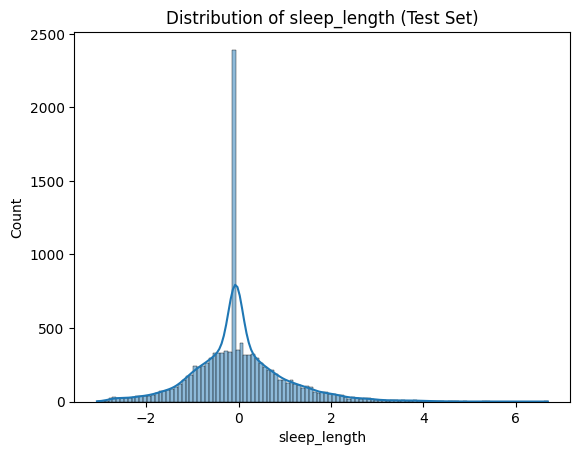

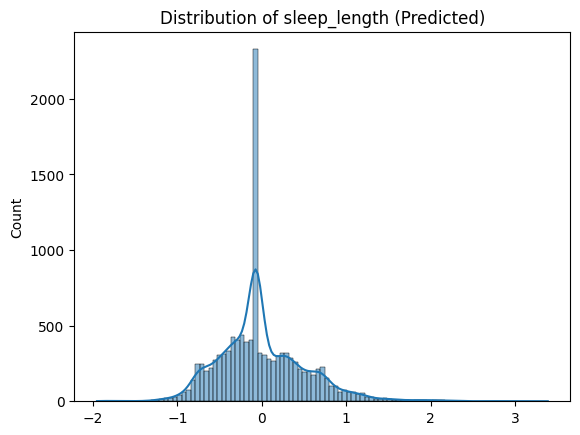

[RandomForest] Target: sleep_efficiency | MSE: 0.467, R²: 0.552


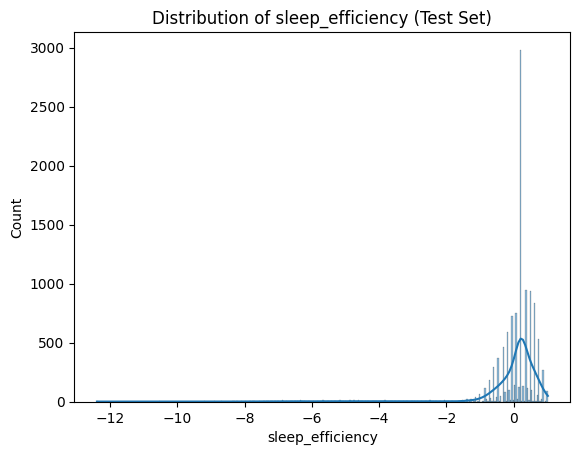

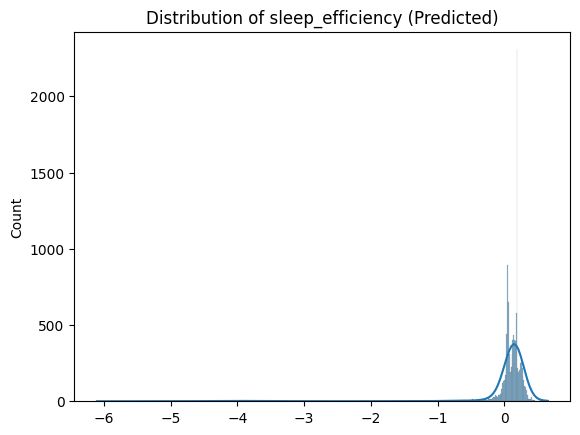

[RandomForest] Target: sleep_onset_dev | MSE: 0.649, R²: 0.369


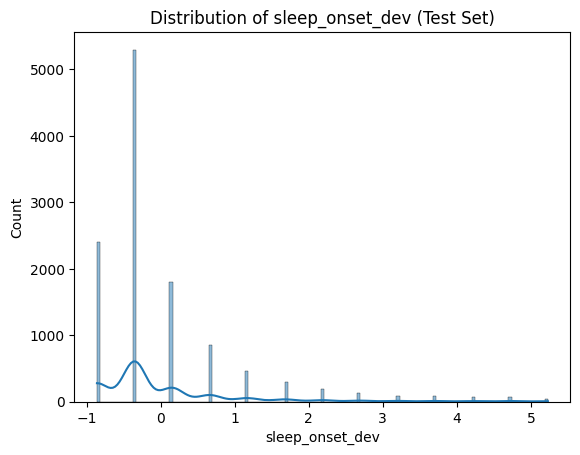

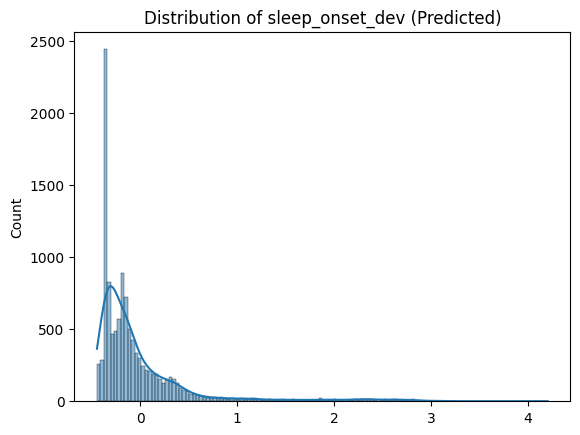

[RandomForest] Target: sleep_counts | MSE: 0.368, R²: 0.653


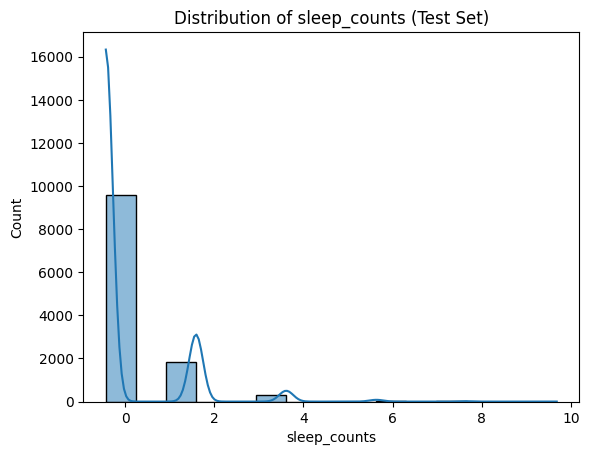

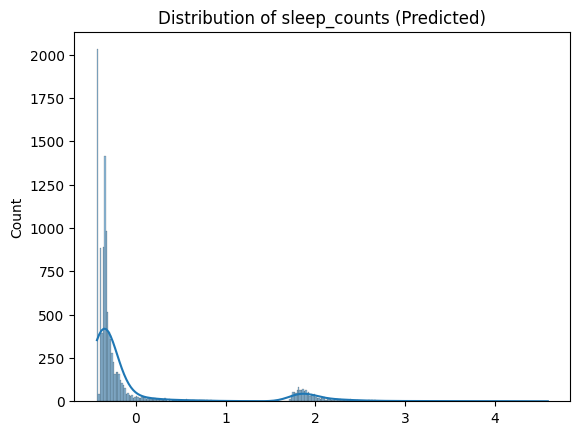

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

for t in targets:
    target = data[t]
    
    # 80% 훈련, 20% 테스트
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        target,
        test_size=0.2,
        random_state=random_seed
    )

    # Random Forest 모델 정의 및 학습
    rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=random_seed)
    rf.fit(X_train, y_train)
    
    # 예측
    y_pred = rf.predict(X_test)
    
    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'[RandomForest] Target: {t} | MSE: {mse:.3f}, R²: {r2:.3f}')
    
    # 분포 시각화 (테스트 데이터)
    sns.histplot(y_test, kde=True)
    plt.title(f'Distribution of {t} (Test Set)')
    plt.show()

    # 분포 시각화 (예측값)
    sns.histplot(y_pred, kde=True)
    plt.title(f'Distribution of {t} (Predicted)')
    plt.show()
